# Bank Customer Churn Prediction
In this notebook there is a work with Bank Customer Churn Prediction (DLU Course c.4) dataset from kaggle competition - https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu-course-c-4

In [1]:
import pandas as pd
import numpy as np

from mlpeople.io.google_drive import download_file_iss

# download files from google drive
download_file_iss('1Xz-cqp6y-Y_oCiaSJeNsbU3-o5lM-5wY', output_path='./downloads/train.csv')
download_file_iss('1jsg2iPVphDMiHCEyqQeDSc4yDcMB3-r_', output_path='./downloads/test.csv')
download_file_iss('1tv0beG2n8cUQ6KcdaXhFzQI_Fd9640gg', output_path='./downloads/sample_submission.csv')

# read train.csv / show first 5 rows / show info
raw_df = pd.read_csv('downloads/train.csv', index_col=0)
display(raw_df.shape)
display(raw_df.head())
display(raw_df.info())

(15000, 13)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0


<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       15000 non-null  float64
 1   Surname          15000 non-null  object 
 2   CreditScore      15000 non-null  float64
 3   Geography        15000 non-null  object 
 4   Gender           15000 non-null  object 
 5   Age              15000 non-null  float64
 6   Tenure           15000 non-null  float64
 7   Balance          15000 non-null  float64
 8   NumOfProducts    15000 non-null  float64
 9   HasCrCard        15000 non-null  float64
 10  IsActiveMember   15000 non-null  float64
 11  EstimatedSalary  15000 non-null  float64
 12  Exited           15000 non-null  float64
dtypes: float64(10), object(3)
memory usage: 1.6+ MB


None

## EDA

### Features

In [2]:
from mlpeople.eda.reporting import describe_dataframe

describe_dataframe(raw_df)

,column_id,data_type,unique_values,missing_values,mean,std,min,max
0,CustomerId,float64,6348,0,15691456.68,135205.03,1581102.00,15815690.00
1,Surname,object,764,0,NaN,NaN,NaN,NaN
2,CreditScore,float64,378,0,658.94,72.26,431.00,850.00
3,Geography,object,3,0,NaN,NaN,NaN,NaN
4,Gender,object,2,0,NaN,NaN,NaN,NaN
5,Age,float64,56,0,37.74,8.22,18.00,74.00
6,Tenure,float64,11,0,5.03,2.78,0.00,10.00
7,Balance,float64,3395,0,42729.79,59727.31,0.00,209767.31
8,NumOfProducts,float64,4,0,1.59,0.53,1.00,4.00
9,HasCrCard,float64,2,0,0.79,0.41,0.00,1.00


### Correlation numeric

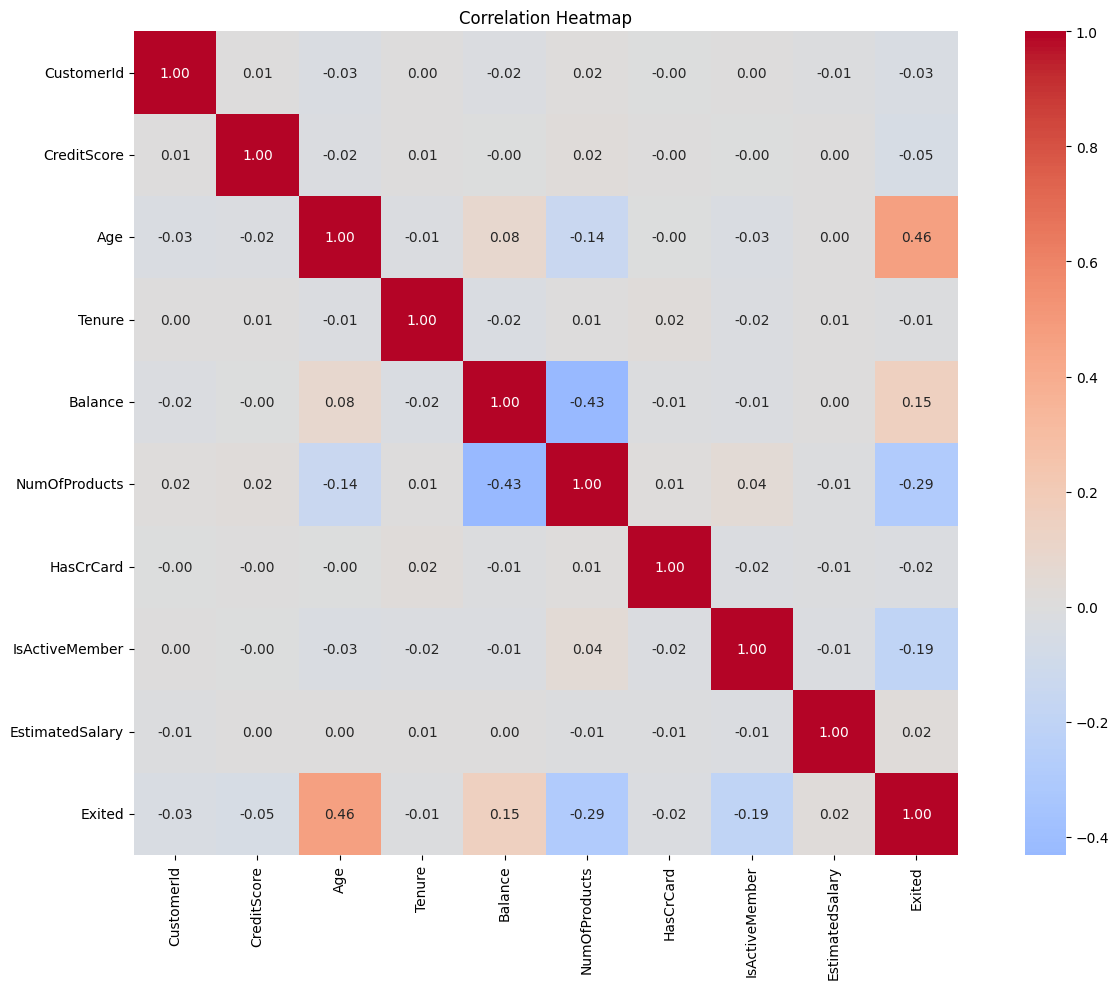

In [3]:
from mlpeople.visualization.relationships.correlation import plot_correlation_heatmap

target_col = 'Exited'

plot_correlation_heatmap(raw_df.drop('Exited', axis=1), y=raw_df[target_col])

### Categorical cols

#### Gender & Geography

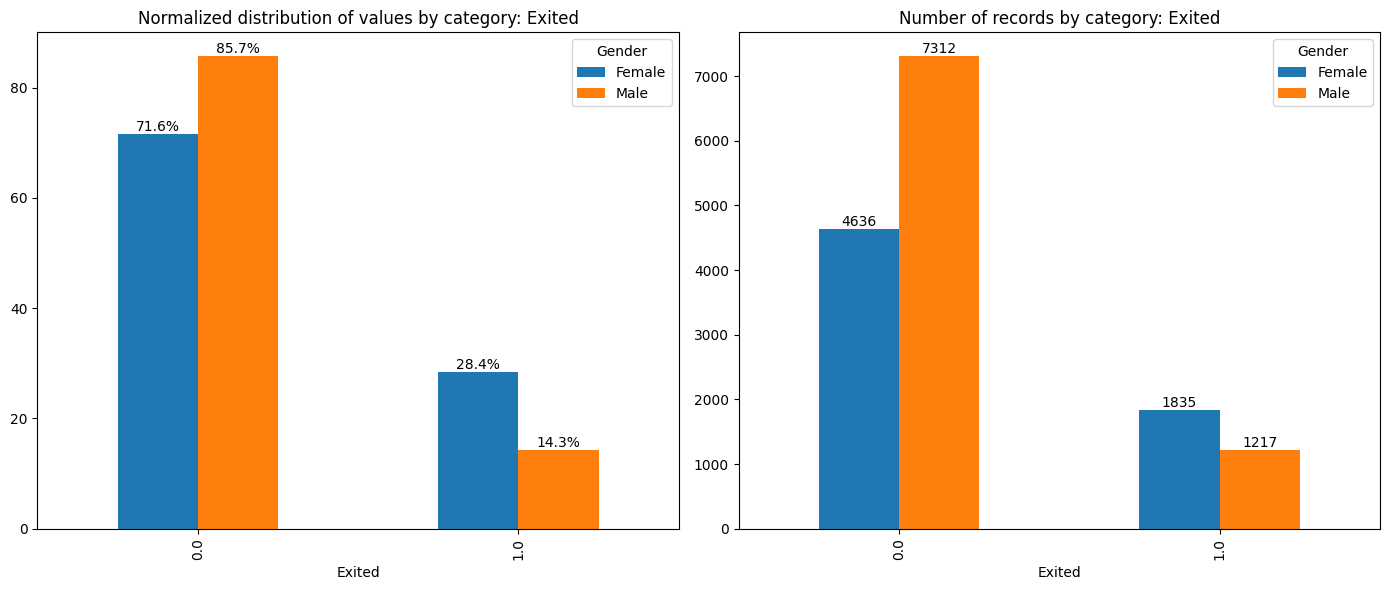

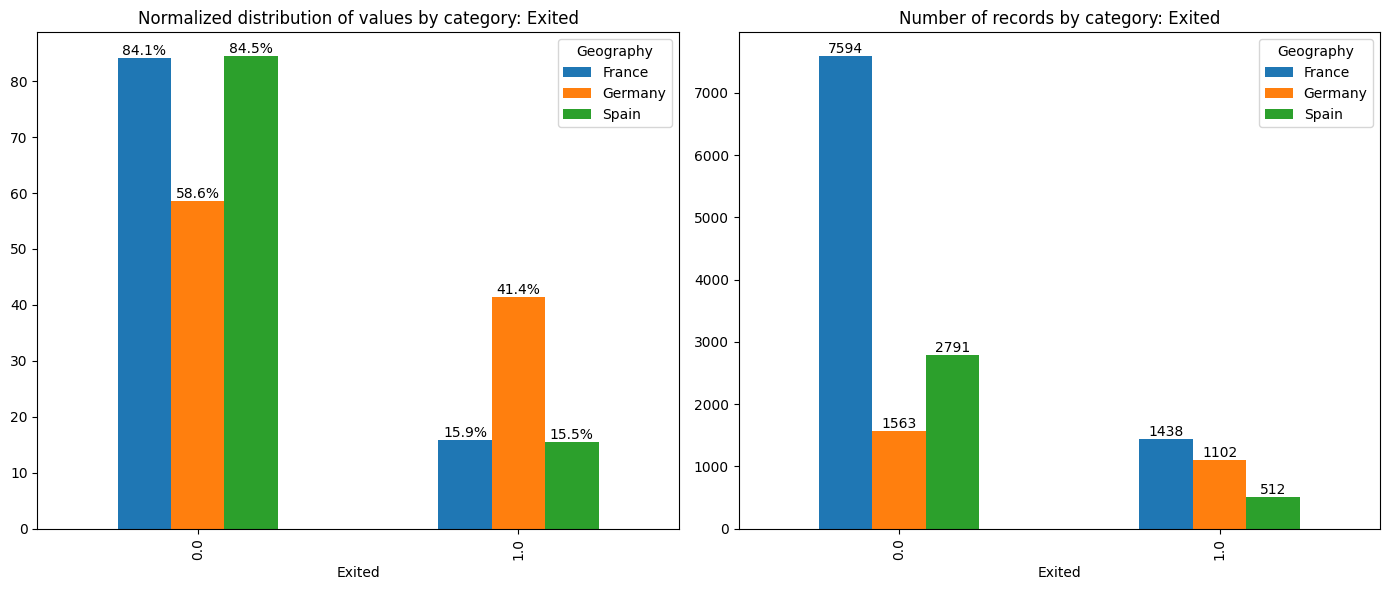

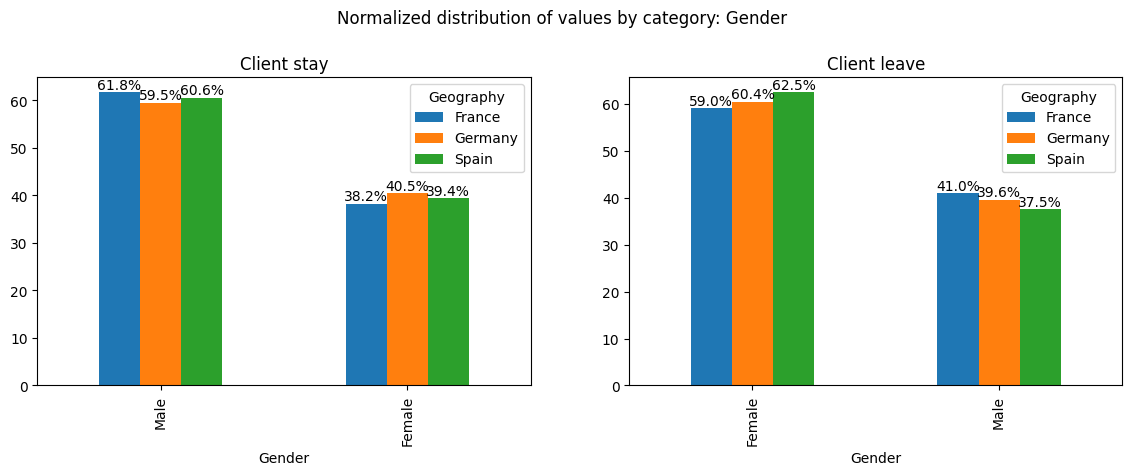

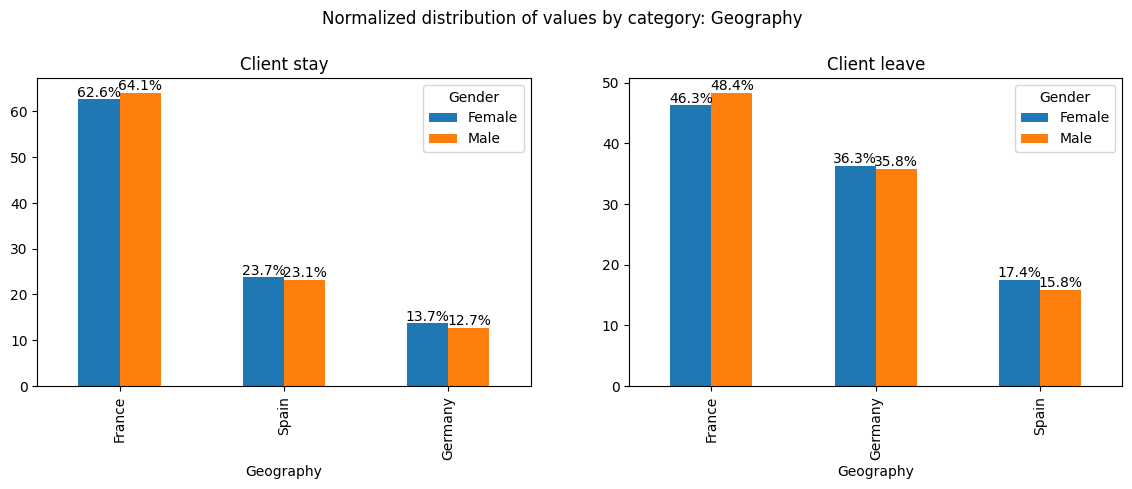

In [4]:
from mlpeople.visualization.categorical.countplots import draw_bi_cat_countplot, draw_bi_countplot_target


draw_bi_cat_countplot(
    raw_df, target_col, 'Gender'
)

draw_bi_cat_countplot(
    raw_df, target_col, 'Geography'
)

draw_bi_countplot_target(
    raw_df, 'Gender', hue_col='Geography',
    target_col=target_col, normalize=True,
    titles={
        0: 'Client stay',
        1: 'Client leave'
    })

draw_bi_countplot_target(
    raw_df, 'Geography', hue_col='Gender',
    target_col=target_col, normalize=True,
    titles={
        0: 'Client stay',
        1: 'Client leave'
    })


 - More "Male" than "Female" data in dataset
 - "Female" are more inclined to leave (exit)
 - More "France" than "Germany" and "Spain" data in dataset
 - "Germany" are more inclined to leave (exit)
 - "Gender" and "Geograpfy" seems to not have a lot of corralation between them
 - "Gender" and "Geograpfy" definetely should be included into model train input features

#### Surname ?

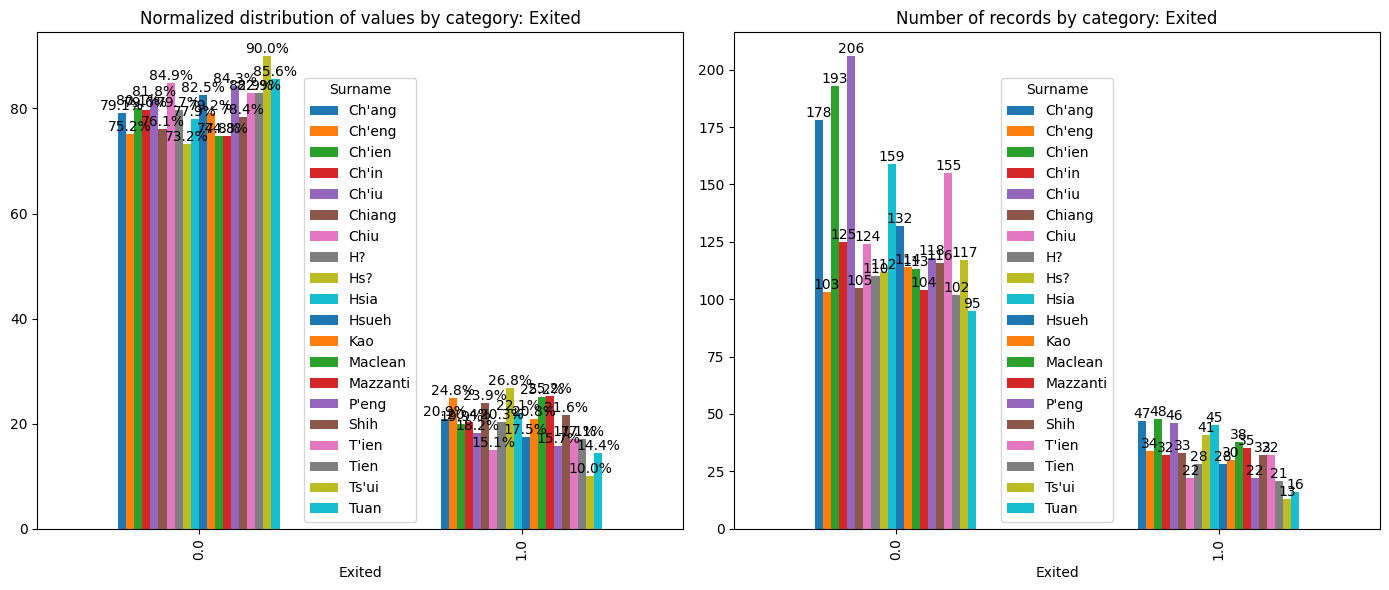

In [5]:
top20 = raw_df["Surname"].value_counts().head(20).index

draw_bi_cat_countplot(
    raw_df[raw_df["Surname"].isin(top20)], target_col, "Surname"
)

 - Among the 20 most popular "Surname" values, there is no strong correlation with the "Exited" column. As expected, "Surname" appears to be useless for model training. However, we could include the top 10, 20, or 30 surnames as one-hot encoded features in some experiments.

### Numeric cols

#### Histograms

In [6]:
from mlpeople.visualization.distributions.histograms import plt_histogram

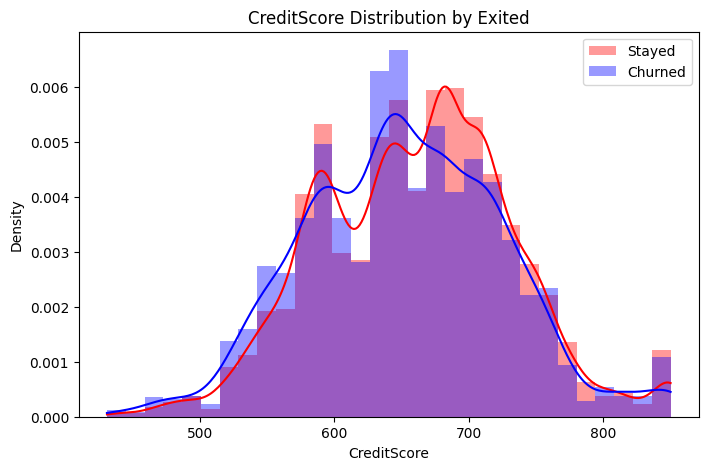

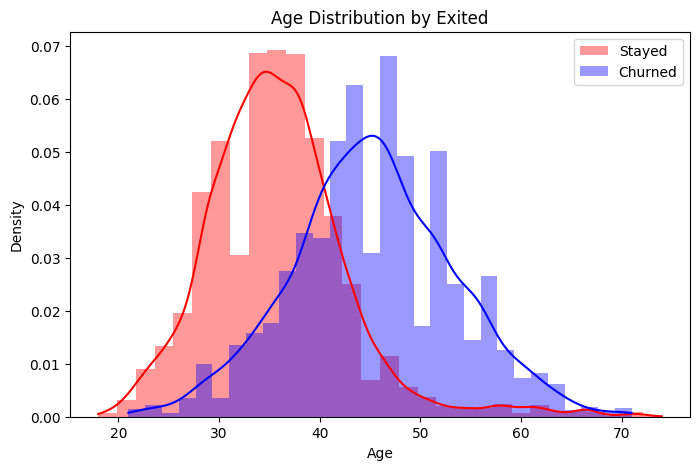

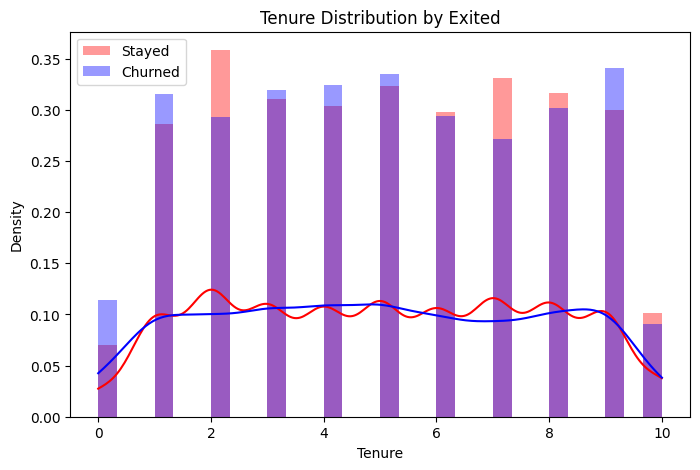

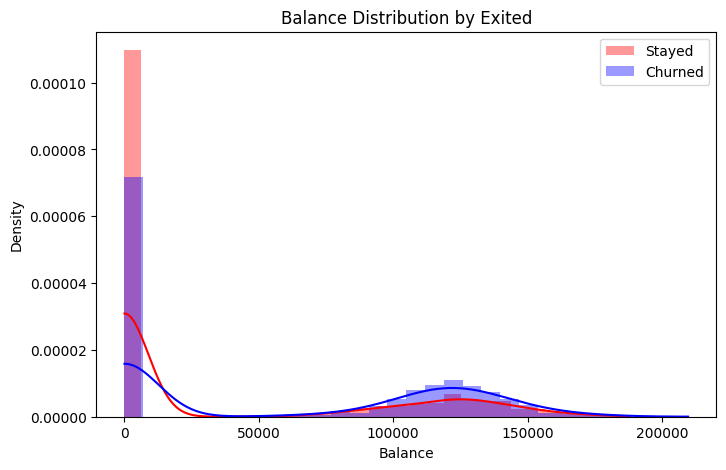

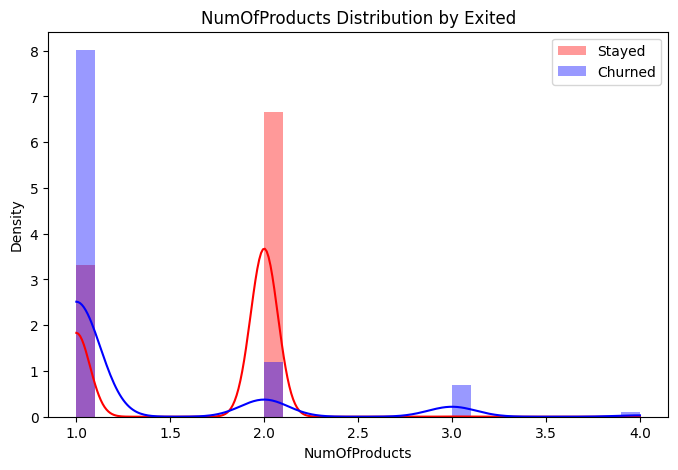

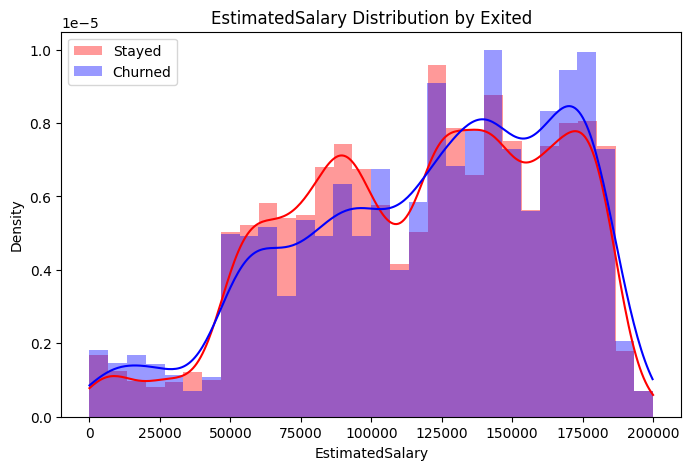

In [7]:
numeric_cols = raw_df.select_dtypes(include="number").columns
binary_numeric_cols = [
    col for col in raw_df.select_dtypes(include="number").columns
    if raw_df[col].nunique() == 2
]
skip_cols = [target_col, 'CustomerId']

for col in numeric_cols:
    if col not in skip_cols and col not in binary_numeric_cols:
        plt_histogram(
            raw_df,
            col=col,
            color_col=target_col,
            labels={0: "Stayed", 1: "Churned"},
            density=True
        )

 - "Age" is definetely make difference
 - "Balance" might require more investigation cause of special distribution

#### Numeric Binary 

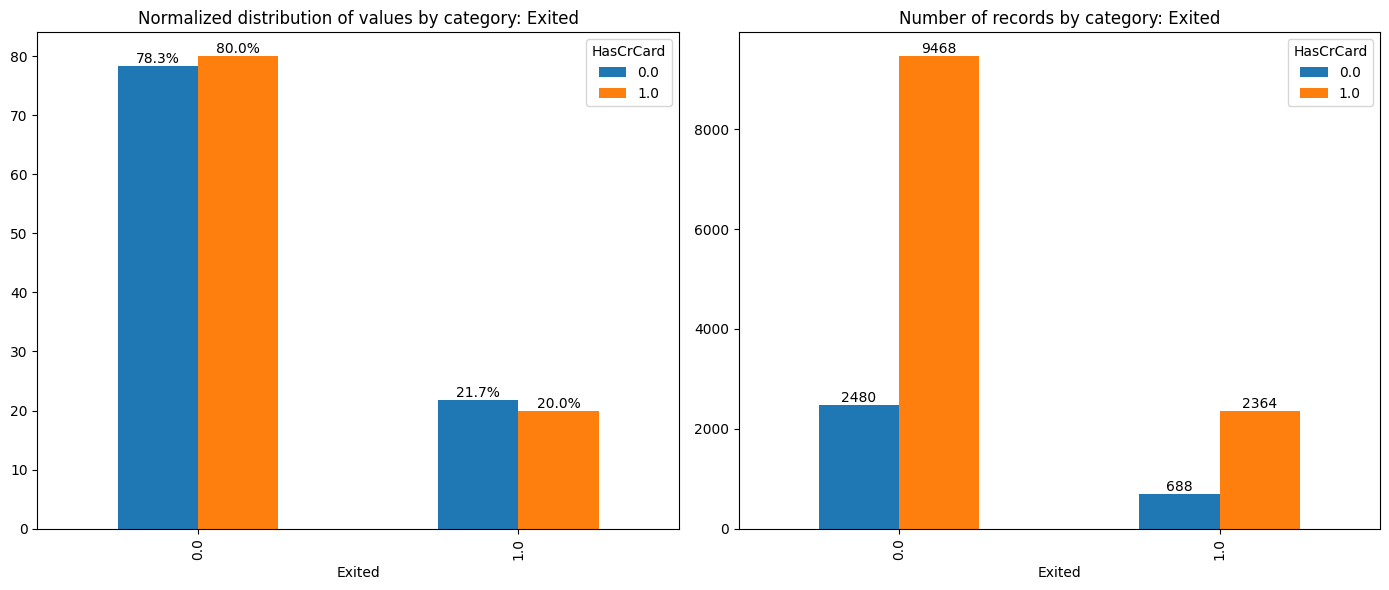

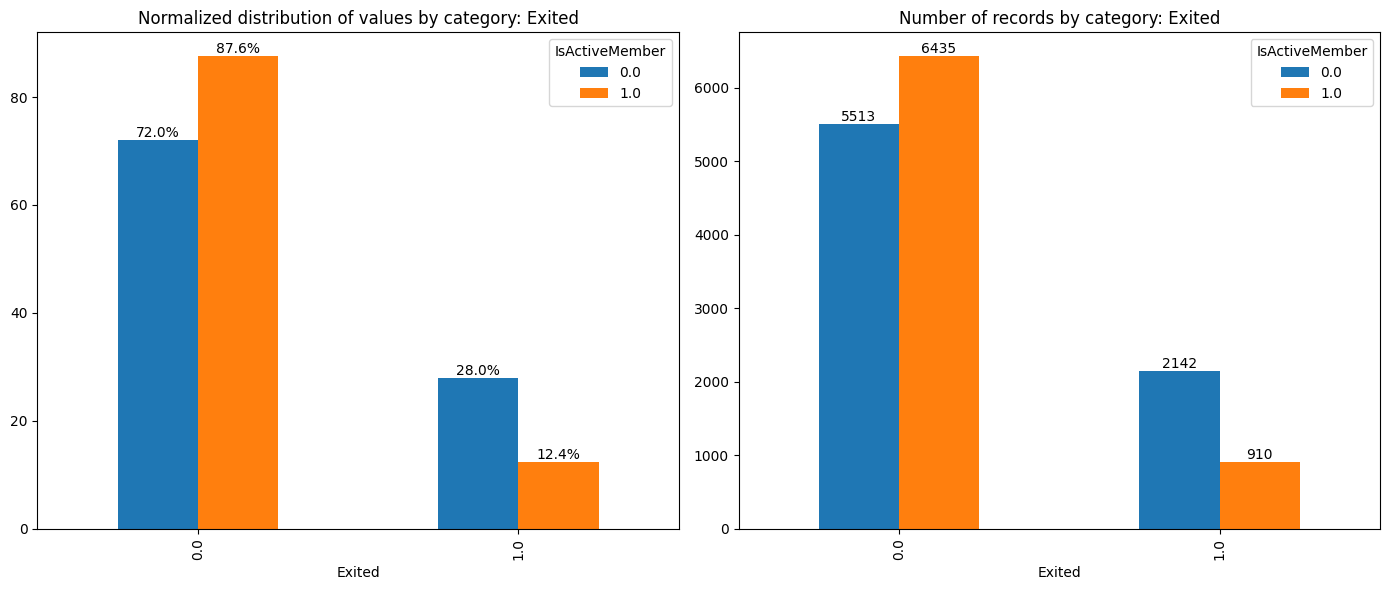

In [8]:
for col in binary_numeric_cols:
    if col not in skip_cols:
        draw_bi_cat_countplot(
            raw_df, target_col, col
        )

 - "iSActiveMemeber" seems to have impact on target. 
 - "HasCrCard" does not have noticeable impact

#### Balance col

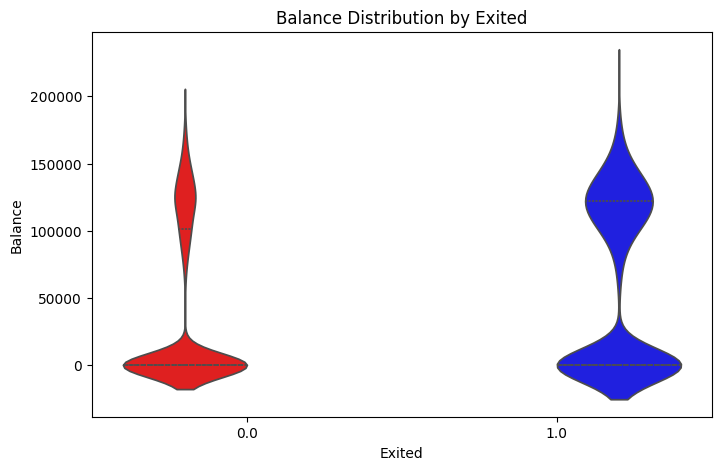

In [9]:
from mlpeople.visualization.distributions.violins import plt_violin

plt_violin(raw_df, 'Balance', x=target_col)

In [10]:
percentage = (raw_df['Balance'] == 0).mean() * 100
print(f"Percentage of rows where Balance = 0: {percentage:.2f}%")

Percentage of rows where Balance = 0: 64.95%


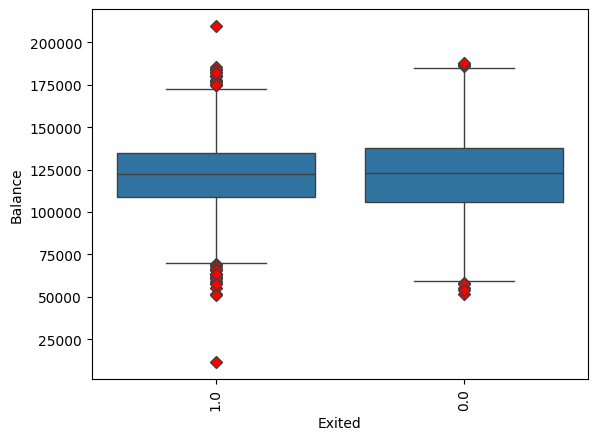

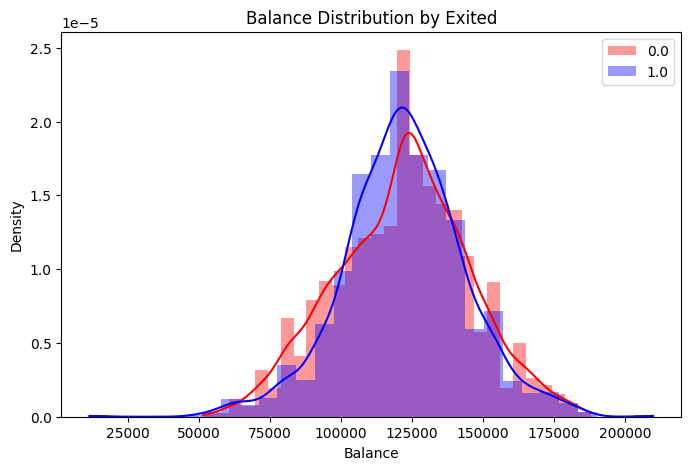

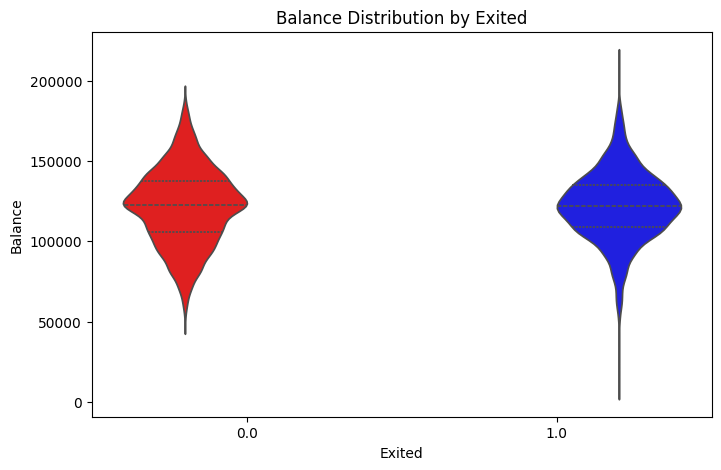

In [11]:
from mlpeople.visualization.categorical.boxplots import draw_boxplot

draw_boxplot(raw_df[raw_df['Balance'] > 0], target_col, 'Balance')
plt_histogram(raw_df[raw_df['Balance'] > 0], 'Balance', color_col=target_col)
plt_violin(raw_df[raw_df['Balance'] > 0], 'Balance', x=target_col)

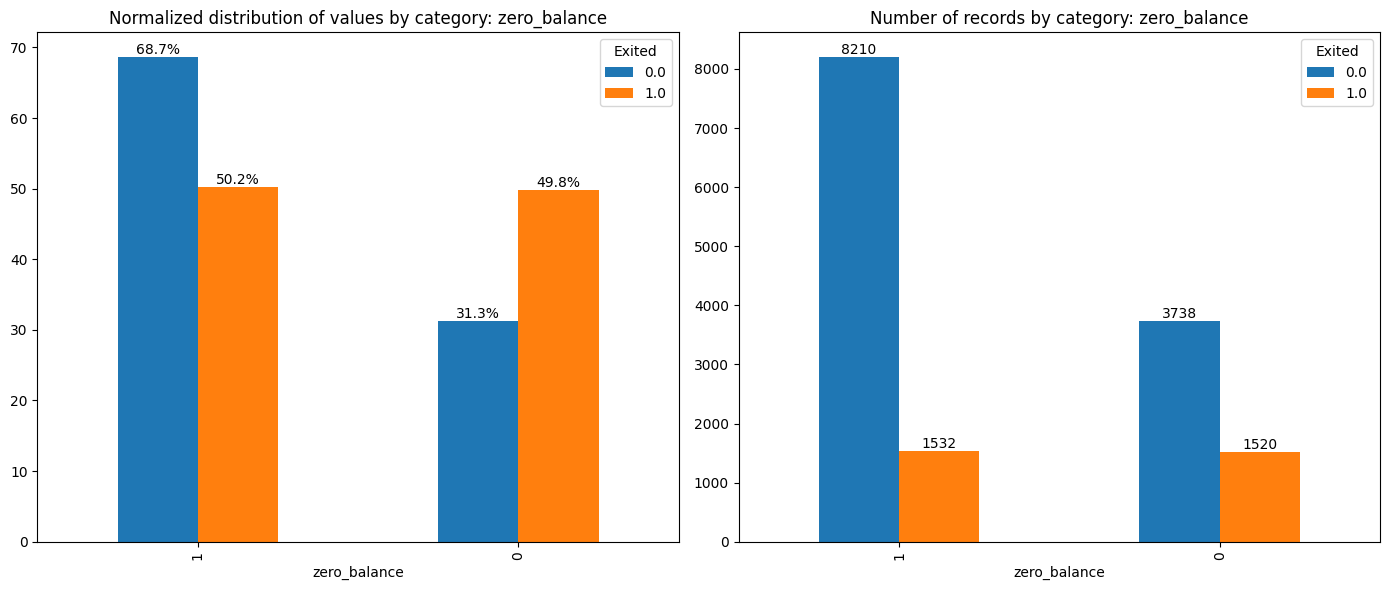

In [12]:
draw_bi_cat_countplot(
    df=raw_df.assign(zero_balance=(raw_df['Balance'] == 0).astype(int)),
    column='zero_balance',
    hue_column=target_col
)

 - 64% of rows have a Balance of 0.
 - Among the non-zero Balance values, there is no noticeable correlation with the target.
 - Having a zero Balance appears to impact the target: customers with zero Balance are more likely to stay.

## Scale Data

In [13]:
from sklearn.preprocessing import StandardScaler

# Make a copy to avoid modifying original
df_scaled = raw_df.copy()

numeric_cols = df_scaled.select_dtypes(include='number').columns.tolist()
# filter out target_col and binary cols
binary_numeric_cols = [col for col in binary_numeric_cols if col != target_col]
numeric_cols = [col for col in numeric_cols if col != target_col and col not in binary_numeric_cols]

# Initialize scaler
scaler = StandardScaler()

# Fit and transform only numeric columns
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

# df_scaled now has scaled numeric columns; target is unchanged
df_scaled.head()


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,0.654793,Nwankwo,0.263736,France,Male,-1.063459,-0.369254,-0.715438,2.647186,1.0,0.0,1.374102,0.0
1,-0.305995,Ch'in,0.388298,France,Female,-0.455045,-1.449718,-0.715438,0.768505,0.0,1.0,-1.181829,0.0
2,0.311725,Thompson,0.319097,France,Female,1.735245,0.351055,-0.715438,2.647186,0.0,0.0,1.352881,1.0
3,-0.337740,Macleod,1.301748,Germany,Male,0.761783,0.351055,0.680071,0.768505,1.0,0.0,0.953860,0.0
4,-0.426157,Hsia,-1.590845,Germany,Female,2.100294,-1.809873,1.088613,-1.110175,1.0,0.0,1.285643,1.0


## Features and coefs statistics

In [14]:
import pandas as pd
import statsmodels.api as sm

def logistic_stats(X, y):
    """
    Fit logistic regression using statsmodels and return:
      1) DataFrame with coef, p-values, confidence intervals
      2) statsmodels summary object
    """
    X = sm.add_constant(X)
    model = sm.Logit(y, X).fit(disp=False)
    
    coef_df = pd.DataFrame({
        'coef': round(model.params, 3),
        'pval': round(model.pvalues, 3),
        'conf_low': round(model.conf_int()[0], 3),
        'conf_high': round(model.conf_int()[1], 3)
    })
    
    return coef_df, model.summary()



#### Only numeric

In [15]:
X = df_scaled[numeric_cols + binary_numeric_cols]
y = df_scaled[target_col]

coef_df, summary = logistic_stats(X, y)

print(coef_df.sort_values(by='pval'))   # Table with coef, p-values, CI
print(summary)   # Full statsmodels summary

                  coef   pval  conf_low  conf_high
const           -1.236  0.000    -1.349     -1.123
CreditScore     -0.130  0.000    -0.179     -0.081
Age              1.279  0.000     1.224      1.334
Balance          0.112  0.000     0.061      0.162
NumOfProducts   -0.651  0.000    -0.705     -0.597
IsActiveMember  -1.309  0.000    -1.415     -1.203
CustomerId      -0.163  0.001    -0.256     -0.069
HasCrCard       -0.162  0.007    -0.280     -0.045
EstimatedSalary  0.063  0.012     0.014      0.112
Tenure          -0.021  0.391    -0.070      0.027
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                15000
Model:                          Logit   Df Residuals:                    14990
Method:                           MLE   Df Model:                            9
Date:                Sun, 08 Feb 2026   Pseudo R-squ.:                  0.3165
Time:                        15:05:29   Log-

 - "CustomerId" is stat significant ?
 - "Tenure" is not stat significant 

### Zero Balance

Use zero balance flag and remove Balance column.
Also drop Tenure which is not significant on previous step

In [16]:
X = df_scaled[numeric_cols + binary_numeric_cols].copy()
X['zero_balance'] = (X['Balance'] == X['Balance'].min()).astype(int)
y = df_scaled[target_col]

coef_df, summary = logistic_stats(X.drop(['Balance', 'Tenure'], axis=1), y)

print(coef_df.sort_values(by='pval'))   # Table with coef, p-values, CI
print(summary)   # Full statsmodels summary

                  coef   pval  conf_low  conf_high
const           -1.071  0.000    -1.202     -0.940
CreditScore     -0.131  0.000    -0.180     -0.082
Age              1.279  0.000     1.225      1.334
NumOfProducts   -0.647  0.000    -0.701     -0.592
IsActiveMember  -1.309  0.000    -1.415     -1.203
zero_balance    -0.253  0.000    -0.360     -0.146
CustomerId      -0.163  0.001    -0.257     -0.070
HasCrCard       -0.164  0.006    -0.281     -0.046
EstimatedSalary  0.062  0.013     0.013      0.111
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                15000
Model:                          Logit   Df Residuals:                    14991
Method:                           MLE   Df Model:                            8
Date:                Sun, 08 Feb 2026   Pseudo R-squ.:                  0.3167
Time:                        15:05:29   Log-Likelihood:                -5178.1
converged:      

 - maybe we can keep only boolean "zero_balance" instead of numeric "Balance" ?

### Gender and Geography 

In [17]:
from mlpeople.eda.categorization import (
    get_fitted_one_hot_encoder,
    get_low_cardinality_cats,
    keep_only_top_n,
)

In [18]:
cat_cols = get_low_cardinality_cats(df_scaled, threshold=10)
encoder = get_fitted_one_hot_encoder(
    df_scaled,
    cat_cols
)

X = df_scaled[numeric_cols + binary_numeric_cols].copy()
X[encoder.get_feature_names_out()] = encoder.transform(
    df_scaled[cat_cols]
)
y = df_scaled[target_col]

coef_df, summary = logistic_stats(X, y)

print(coef_df.sort_values(by='pval'))   # Table with coef, p-values, CI
print(summary)   # Full statsmodels summary

                    coef   pval     conf_low    conf_high
CreditScore       -0.143  0.000       -0.194       -0.092
Age                1.266  0.000        1.209        1.322
Balance           -0.310  0.000       -0.379       -0.241
NumOfProducts     -0.732  0.000       -0.787       -0.677
IsActiveMember    -1.319  0.000       -1.429       -1.209
Gender_Male       -0.850  0.000       -0.953       -0.748
CustomerId        -0.151  0.002       -0.249       -0.054
HasCrCard         -0.191  0.002       -0.314       -0.069
EstimatedSalary    0.065  0.013        0.014        0.116
Tenure            -0.018  0.488       -0.069        0.033
const             -0.437  1.000 -2083761.291  2083760.417
Geography_France  -0.660  1.000 -2083761.515  2083760.194
Geography_Germany  0.942  1.000 -2083759.912  2083761.796
Geography_Spain   -0.719  1.000 -2083761.573  2083760.135
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observa

 - multicollinearity example for Geography_ 

In [19]:
cat_cols = ["Gender"]

encoder = get_fitted_one_hot_encoder(
    df_scaled,
    cat_cols
)

X = df_scaled[numeric_cols + binary_numeric_cols].copy()
X ["IsGermany"] = (df_scaled["Geography"] == "Germany").astype(int)
X ["IsFrance"] = (df_scaled["Geography"] == "France").astype(int)


X[encoder.get_feature_names_out()] = encoder.transform(
    df_scaled[cat_cols]
)
y = df_scaled[target_col]

coef_df, summary = logistic_stats(X, y)

print(coef_df.sort_values(by='pval'))   # Table with coef, p-values, CI
print(summary)   # Full statsmodels summary

                  coef   pval  conf_low  conf_high
const           -1.156  0.000    -1.320     -0.992
CreditScore     -0.143  0.000    -0.194     -0.092
Age              1.266  0.000     1.209      1.322
Balance         -0.310  0.000    -0.379     -0.241
NumOfProducts   -0.732  0.000    -0.787     -0.677
IsActiveMember  -1.319  0.000    -1.429     -1.209
IsGermany        1.661  0.000     1.477      1.846
Gender_Male     -0.850  0.000    -0.953     -0.748
CustomerId      -0.151  0.002    -0.249     -0.054
HasCrCard       -0.191  0.002    -0.314     -0.069
EstimatedSalary  0.065  0.013     0.014      0.116
IsFrance         0.058  0.395    -0.076      0.193
Tenure          -0.018  0.488    -0.069      0.033
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                15000
Model:                          Logit   Df Residuals:                    14987
Method:                           MLE   Df Model:

 - IsGermany seems to be enough

### Surname ?

In [20]:
top_n_surnames = 50
cat_cols = ["Gender", "Surname"]

df_scaled_top_n_surnames, top_counts = keep_only_top_n(df_scaled, "Surname", top_n_surnames)

encoder = get_fitted_one_hot_encoder(
    df_scaled_top_n_surnames,
    cat_cols,
    drop="first"
)

X = df_scaled_top_n_surnames[numeric_cols + binary_numeric_cols].copy()
X["IsGermany"] = (df_scaled_top_n_surnames["Geography"] == "Germany").astype(int)
X[encoder.get_feature_names_out()] = encoder.transform(
    df_scaled_top_n_surnames[cat_cols]
)
y = df_scaled_top_n_surnames[target_col]

coef_df, summary = logistic_stats(X, y)

print(coef_df.sort_values(by='pval').head(30))   # Table with coef, p-values, CI
# print(summary)   # Full statsmodels summary

                   coef   pval  conf_low  conf_high
const            -1.233  0.000    -1.673     -0.793
CreditScore      -0.147  0.000    -0.199     -0.096
Age               1.275  0.000     1.218      1.332
Balance          -0.307  0.000    -0.377     -0.238
NumOfProducts    -0.735  0.000    -0.790     -0.680
IsActiveMember   -1.341  0.000    -1.452     -1.229
IsGermany         1.623  0.000     1.465      1.781
Gender_Male      -0.854  0.000    -0.958     -0.751
HasCrCard        -0.199  0.002    -0.322     -0.075
CustomerId       -0.146  0.004    -0.244     -0.047
EstimatedSalary   0.064  0.015     0.012      0.115
Surname_Ts'ui    -0.850  0.039    -1.655     -0.045
Surname_Maclean   0.654  0.039     0.034      1.275
Surname_Genovese  0.797  0.044     0.020      1.573
Surname_Hsiao     0.728  0.054    -0.013      1.469
Surname_T'ang    -0.836  0.071    -1.743      0.071
Surname_Hsiung    0.656  0.071    -0.056      1.367
Surname_Hs?       0.550  0.091    -0.087      1.187
Surname_Teng

 - Surname brings kind of noise - 3 of 50 most popular are stats significant

### Combine All

In [21]:
cat_cols = ["Gender"]
encoder = get_fitted_one_hot_encoder(
    df_scaled,
    cat_cols
)

X = df_scaled[numeric_cols + binary_numeric_cols].copy()

X['ZeroBalance'] = (X['Balance'] == X['Balance'].min()).astype(int)
X["IsGermany"] = (df_scaled["Geography"] == "Germany").astype(int)
X["IsStatsImportantSurname"] = df_scaled["Surname"].isin(["Ts'ui", "Maclean", "Genovese", "Hsiao"]).astype(int)
X[encoder.get_feature_names_out()] = encoder.transform(
    df_scaled[cat_cols]
)
y = df_scaled[target_col]

coef_df, summary = logistic_stats(X.drop(['Balance', 'Tenure'], axis=1), y)

print(coef_df.sort_values(by='pval'))   # Table with coef, p-values, CI
print(summary)   # Full statsmodels summary

                          coef   pval  conf_low  conf_high
const                   -1.608  0.000    -1.785     -1.430
CreditScore             -0.143  0.000    -0.194     -0.092
Age                      1.265  0.000     1.209      1.322
NumOfProducts           -0.741  0.000    -0.797     -0.686
IsActiveMember          -1.319  0.000    -1.429     -1.209
ZeroBalance              0.726  0.000     0.575      0.876
IsGermany                1.698  0.000     1.534      1.861
Gender_Male             -0.847  0.000    -0.950     -0.744
CustomerId              -0.152  0.002    -0.249     -0.054
HasCrCard               -0.192  0.002    -0.315     -0.070
EstimatedSalary          0.065  0.013     0.014      0.116
IsStatsImportantSurname  0.226  0.121    -0.060      0.512
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                15000
Model:                          Logit   Df Residuals:                    14

## Visualize Logistic Regression

In [38]:
from mlpeople.optimization.experiments import run_1d_plot_experiment, run_2d_plot_experiment

#### 1 feature

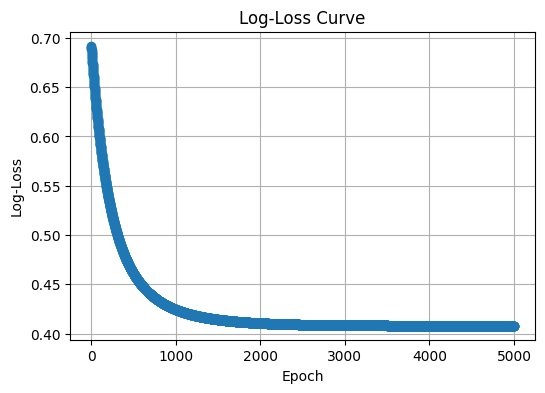

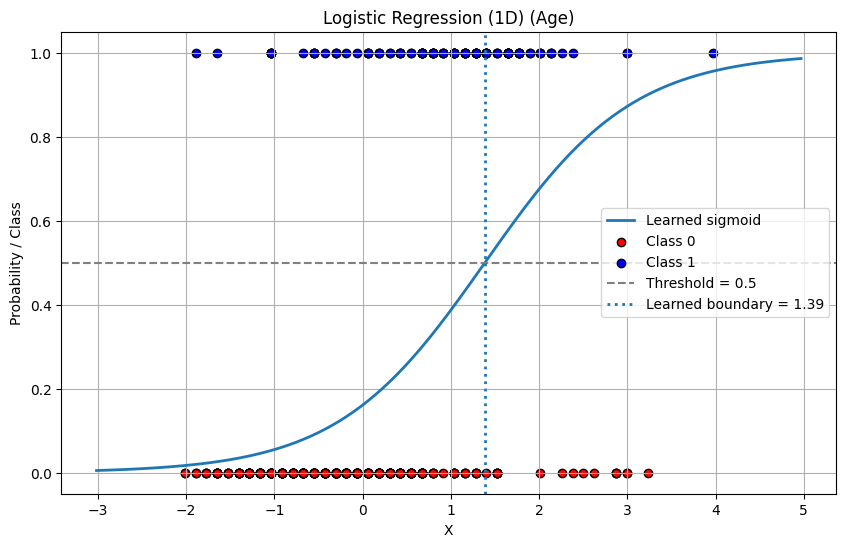

In [39]:
run_1d_plot_experiment(raw_df, 'Age', target_col)

#### 2 features

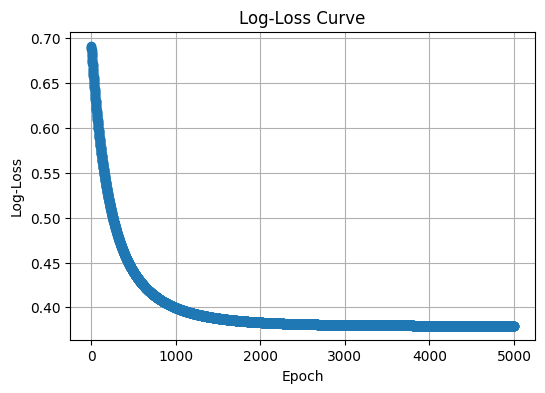

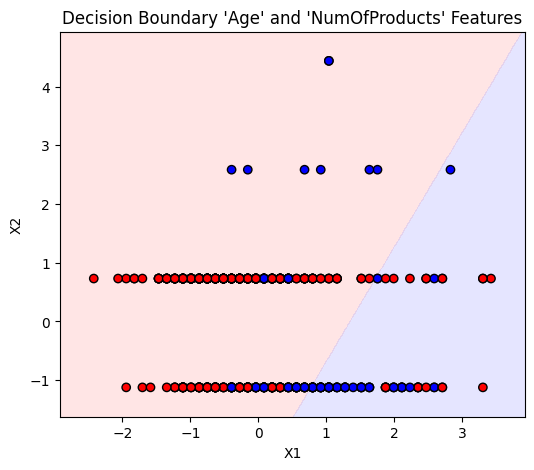

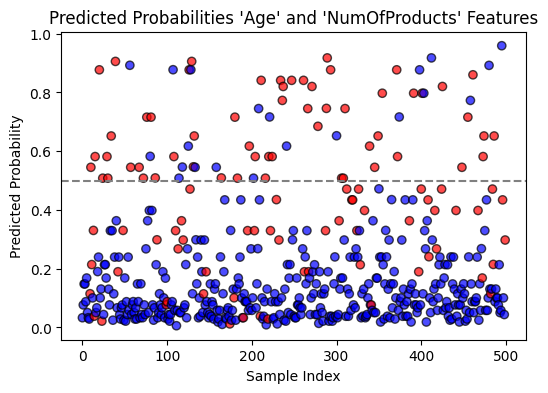

In [40]:
run_2d_plot_experiment(raw_df, 'Age', 'NumOfProducts', target_col)

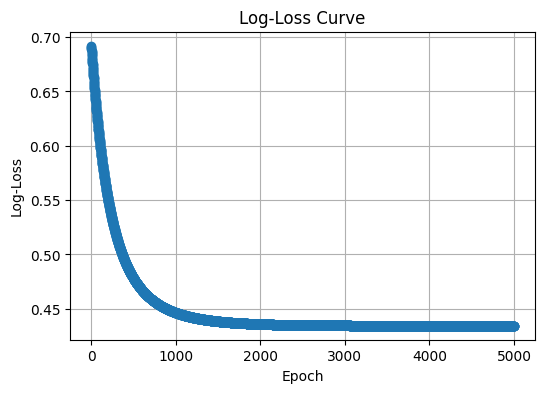

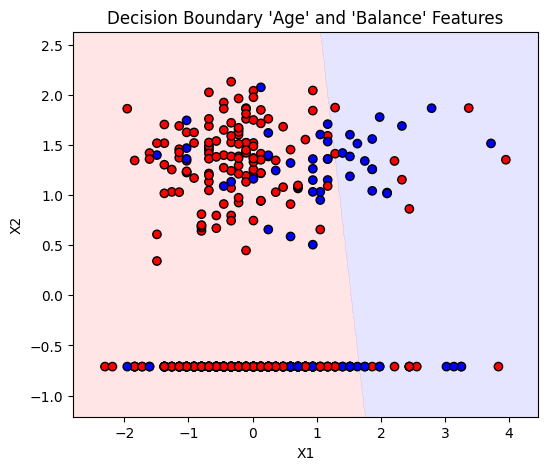

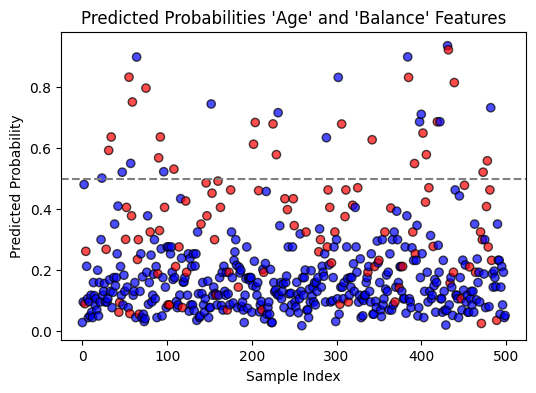

In [41]:
run_2d_plot_experiment(raw_df, 'Age', 'Balance', target_col)

## Looking for best metrics

### Split Train & Val

In [ ]:
from sklearn.model_selection import train_test_split

def split_train_val(df, test_size=0.2, random_state=42, stratif_by_col=None):
    if stratif_by_col is not None:
        return train_test_split(raw_df, test_size=test_size, random_state=random_state, stratify=df[stratif_by_col])
    else:
        return train_test_split(raw_df, test_size=test_size, random_state=random_state)


In [24]:
train_df, val_df = split_train_val(raw_df, test_size=0.2, random_state=42, stratif_by_col="Exited")

In [25]:
def split_input_target(train_df, val_df, target_col, drop_cols=[], verbose=True):
    if target_col not in drop_cols:
        drop_cols.append(target_col)

    input_cols = train_df.columns.drop(drop_cols)

    if verbose:
        print(f"target col: {target_col}")
        print(f"input cols: {input_cols}")

    train_inputs = train_df[input_cols].copy()
    train_targets = train_df[target_col].copy()

    val_inputs = val_df[input_cols].copy()
    val_targets = val_df[target_col].copy()

    return train_inputs, train_targets, val_inputs, val_targets

In [26]:
train_inputs, train_targets, val_inputs, val_targets = split_input_target(
    train_df, val_df, target_col, drop_cols=[], verbose=True
)

target col: Exited
input cols: Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary'],
      dtype='object')


### Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# scale numeric values
# ability to experiment with mode ("MinMax" or "Standard")
def get_fitted_scaler(train_inputs, cols=None, mode="minmax"):
    if cols is None:
        cols = train_inputs.select_dtypes(include=np.number).columns.tolist()

    if mode == "minmax":
        scaler = MinMaxScaler()
    elif mode == "standard":
        scaler = StandardScaler()
    else:
        raise ValueError('mode param expected to be "minmax" or "standard"')

    scaler.fit(train_inputs[cols])

    return scaler

In [28]:
# scale
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
scaler = get_fitted_scaler(train_inputs, mode="minmax")
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

### Categorical Encoding

In [ ]:
categorical_cols = get_low_cardinality_cats(train_inputs, threshold=10)
encoder = get_fitted_one_hot_encoder(
    train_inputs,
    categorical_cols,
)

encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

### Numeric

In [ ]:
import logging

def transformBalance(train_inputs, val_inputs, numeric_cols, drop=True, test_inputs=None):
    if 'Balance' not in train_inputs.columns or 'Balance' not in numeric_cols:
        logging.warning('Balance does not exists in train inputs')
        return train_inputs, val_inputs, train_inputs.select_dtypes(include=np.number).columns.tolist()

    zero_balance_col = 'ZeroBalance'
    train_inputs[zero_balance_col] = (train_inputs['Balance'] == train_inputs['Balance'].min()).astype(int)
    val_inputs[zero_balance_col] = (val_inputs['Balance'] == val_inputs['Balance'].min()).astype(int)
    if test_inputs:
        test_inputs[zero_balance_col] = (test_inputs['Balance'] == test_inputs['Balance'].min()).astype(int)
    numeric_cols.append(zero_balance_col)

    if drop:
        numeric_cols.remove('Balance')
        return train_inputs.drop('Balance', axis=1), val_inputs.drop('Balance', axis=1), test_inputs, numeric_cols

    return train_inputs, val_inputs, test_inputs, numeric_cols

    

In [31]:
train_inputs, val_inputs, _, numeric_cols = transformBalance(train_inputs, val_inputs, numeric_cols)

### Based Model (LogisticRegression)

In [32]:
from sklearn.linear_model import LogisticRegression

X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]

model = LogisticRegression(solver='liblinear')
model.fit(X_train, train_targets)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [33]:
from sklearn.metrics import roc_curve, auc

def predict_and_score(model, inputs, targets, name='', threshold=0.5, verbose=True):
    # Predict probabilities
    y_pred_proba = model.predict_proba(inputs)[:, 1]

    # predict target based on threshold, calculate f1 and confusion matrix
    preds = (y_pred_proba >= threshold).astype(int)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(targets, y_pred_proba, pos_label=1)

    # Compute AUROC
    roc_auc = auc(fpr, tpr)
    if verbose:
        print(f'AUROC for {name}: {roc_auc:.4f}')


    return preds, y_pred_proba, roc_auc

train_preds, train_pred_proba, roc_auc_train = predict_and_score(model, X_train, train_targets, 'Training')
val_preds, val_pred_proba, roc_auc_val = predict_and_score(model, X_val, val_targets, 'Validation')

AUROC for Training: 0.8827
AUROC for Validation: 0.8796


### Experiments

#### One experiment function

In [34]:
# move all to params
def run_experiment(
    df,
    test_df=None,
    test_size=0.2,
    stratif_by_col="Exited",
    drop_cols=[],
    categorical_cols=["Gender"],
    scale_mode="minmax",
    top_n_surnames=None,
    encode_drop="if_binary",
    geography_flags=["Germany"],
    use_zero_balance=True,
    drop_balance=False,
    model=LogisticRegression(solver='liblinear'),
    random_state=42,
):
    # step 1 - split train / validataon
    train_df, val_df = split_train_val(df, test_size=test_size, random_state=random_state, stratif_by_col=stratif_by_col)

    # step 2 - drop cols if needed
    train_inputs, train_targets, val_inputs, val_targets = split_input_target(
        train_df, val_df, target_col, drop_cols=drop_cols, verbose=False
    )
    

    # step 3 - scale numeric
    numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
    scaler = get_fitted_scaler(train_inputs, mode=scale_mode)
    train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
    val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

    # if test df provided create test_inputs
    if test_df is not None:
        test_inputs = test_df.copy()
        test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])
    else:
        test_inputs = None

    # step 4 - encode categorical
    # experiments with surname usage
    if top_n_surnames and "Surname" in categorical_cols:
        train_inputs, top_counts = keep_only_top_n(train_inputs, "Surname", top_n_surnames)
    
        top_surnames = set(top_counts.index)
        val_inputs["Surname"] = val_inputs["Surname"].where(
            val_inputs["Surname"].isin(top_surnames)
        )

        # if test df provided transform test_inputs
        if test_df is not None:
            test_inputs["Surname"] = test_inputs["Surname"].where(
                test_inputs["Surname"].isin(top_surnames)
            )

    encoder = get_fitted_one_hot_encoder(
        train_inputs,
        categorical_cols,
        drop=encode_drop
    )

    encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
    train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
    val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

    # if test df provided transform test_inputs
    if test_df is not None:
        test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

    # step 5 - Geography special - IsGernamy
    if geography_flags and "Geography" not in categorical_cols:
        for geography_flag in geography_flags:
            train_inputs["Is" + geography_flag] = (train_inputs["Geography"] == geography_flag).astype(int)
            val_inputs["Is" + geography_flag] = (val_inputs["Geography"] == geography_flag).astype(int)
            encoded_cols.append("Is" + geography_flag)

            # if test df provided transform test_inputs
            if test_df is not None:
                test_inputs["Is" + geography_flag] = (test_inputs["Geography"] == geography_flag).astype(int)
    
    # step 6 - balance special
    if use_zero_balance:
        # if test df provided transform test_inputs
        train_inputs, val_inputs, test_inputs, numeric_cols = transformBalance(train_inputs, val_inputs, numeric_cols, drop=drop_balance, test_inputs=test_inputs)

    # step 7 - create X_train and X_val features
    X_train = train_inputs[numeric_cols + encoded_cols]
    X_val = val_inputs[numeric_cols + encoded_cols]

    # if test df provided creat X_test
    if test_inputs is not None:
        X_test = test_inputs[numeric_cols + encoded_cols]
    else:
        X_test = None
    
    # step 8 - train model
    model.fit(X_train, train_targets)

    # step 9 - predict and calculate metrics
    train_preds, train_pred_proba, roc_auc_train = predict_and_score(model, X_train, train_targets, 'Training', verbose=False)
    val_preds, val_pred_proba, roc_auc_val = predict_and_score(model, X_val, val_targets, 'Validation', verbose=False)

    # if test df provided predict test probabilities
    if X_test is not None:
        # Predict probabilities
        y_test_proba = model.predict_proba(X_test)[:, 1]
        return train_pred_proba, val_pred_proba, y_test_proba, roc_auc_train, roc_auc_val, model

    return train_pred_proba, val_pred_proba, roc_auc_train, roc_auc_val, model




In [35]:
train_pred_probs, val_pred_probs, roc_auc_train, roc_auc_val, _ = run_experiment(
    raw_df,
    test_size=0.2,
    scale_mode="minmax",
    drop_cols=[], # "CustomerId", "Tenure"
    use_zero_balance=False,
    drop_balance=False,
    categorical_cols=["Gender"],
    # top_n_surnames=10,
    model=LogisticRegression(solver='liblinear')
)
roc_auc_train, roc_auc_val

(0.8823605749217802, 0.8798971122847932)

#### Multiple experiments function (compare experiments result)

In [36]:
from itertools import product
import pandas as pd

def run_experiments(
    df,
    test_size_options=[0.2],
    stratif_by_col_options=["Exited"],
    drop_cols_options=[[], ["CustomerId"]],
    categorical_cols_options=[["Gender"],["Gender", "Geography"]],
    scale_mode_options=["minmax", "standard"],
    top_n_surnames_options=[None],
    encode_drop_options=["if_binary", 'first', None],
    geography_flags_options=[[], ["Germany"]],
    use_zero_balance_options=[True, False],
    drop_balance_options=[True, False],
    model_options=[LogisticRegression(solver='liblinear')]
):

    results = []

    for (
        test_size,
        stratif_by_col,
        drop_cols,
        categorical_cols,
        scale_mode,
        top_n_surnames,
        encode_drop,
        geography_flags,
        use_zero_balance,
        drop_balance,
        model
    ) in product(
        test_size_options,
        stratif_by_col_options,
        drop_cols_options,
        categorical_cols_options,
        scale_mode_options,
        top_n_surnames_options,
        encode_drop_options,
        geography_flags_options,
        use_zero_balance_options,
        drop_balance_options,
        model_options
    ):

        # Prevent invalid combos (time saver)
        if top_n_surnames and "Surname" not in categorical_cols:
            continue

        if drop_balance and not use_zero_balance:
            continue

        try:
            _, _, roc_auc_train, roc_auc_val, _ = run_experiment(
                df=df,
                test_size=test_size,
                stratif_by_col=stratif_by_col,
                drop_cols=drop_cols,
                categorical_cols=categorical_cols,
                scale_mode=scale_mode,
                top_n_surnames=top_n_surnames,
                encode_drop=encode_drop,
                geography_flags=geography_flags,
                use_zero_balance=use_zero_balance,
                drop_balance=drop_balance,
                model=model
            )

            results.append({
                "test_size": test_size,
                "stratif_by_col": stratif_by_col,
                "drop_cols": tuple(drop_cols),
                "categorical_cols": tuple(categorical_cols),
                "scale_mode": scale_mode,
                "top_n_surnames": top_n_surnames,
                "encode_drop": encode_drop,
                "geography_flags": tuple(geography_flags),
                "use_zero_balance": use_zero_balance,
                "drop_balance": drop_balance,
                "model": type(model).__name__,
                "roc_auc_train": roc_auc_train,
                "roc_auc_val": roc_auc_val,
                "overfit_gap": roc_auc_train - roc_auc_val
            })

        except Exception as e:
            print("FAILED:", e)

    results_df = pd.DataFrame(results)

    return results_df.sort_values("roc_auc_val", ascending=False)


#### Base Experiments

In [37]:
%%time
import warnings
warnings.filterwarnings("ignore")

results_df = run_experiments(raw_df)

results_df.sort_values("roc_auc_val", ascending=False).head(10)

CPU times: user 2.97 s, sys: 94.8 ms, total: 3.06 s
Wall time: 3.16 s


,test_size,stratif_by_col,drop_cols,categorical_cols,scale_mode,top_n_surnames,encode_drop,geography_flags,use_zero_balance,drop_balance,model,roc_auc_train,roc_auc_val,overfit_gap
29,0.2,Exited,"(Exited,)","(Gender,)",standard,None,first,"(Germany,)",False,False,LogisticRegression,0.882869,0.880080,0.002788
23,0.2,Exited,"(Exited,)","(Gender,)",standard,None,if_binary,"(Germany,)",False,False,LogisticRegression,0.882869,0.880080,0.002788
35,0.2,Exited,"(Exited,)","(Gender,)",standard,None,None,"(Germany,)",False,False,LogisticRegression,0.882865,0.880069,0.002796
28,0.2,Exited,"(Exited,)","(Gender,)",standard,None,first,"(Germany,)",True,False,LogisticRegression,0.883081,0.880017,0.003064
22,0.2,Exited,"(Exited,)","(Gender,)",standard,None,if_binary,"(Germany,)",True,False,LogisticRegression,0.883081,0.880017,0.003064
21,0.2,Exited,"(Exited,)","(Gender,)",standard,None,if_binary,"(Germany,)",True,True,LogisticRegression,0.883091,0.880001,0.003089
27,0.2,Exited,"(Exited,)","(Gender,)",standard,None,first,"(Germany,)",True,True,LogisticRegression,0.883091,0.880001,0.003089
33,0.2,Exited,"(Exited,)","(Gender,)",standard,None,None,"(Germany,)",True,True,LogisticRegression,0.883083,0.879987,0.003096
34,0.2,Exited,"(Exited,)","(Gender,)",standard,None,None,"(Germany,)",True,False,LogisticRegression,0.883079,0.879977,0.003102
68,0.2,Exited,"(Exited,)","(Gender, Geography)",standard,None,None,(),False,False,LogisticRegression,0.882956,0.879930,0.003026


In [38]:
best_minmax = results_df[results_df["scale_mode"] == "minmax"] \
                .sort_values("roc_auc_val", ascending=False) \
                .head(1)
best_minmax

,test_size,stratif_by_col,drop_cols,categorical_cols,scale_mode,top_n_surnames,encode_drop,geography_flags,use_zero_balance,drop_balance,model,roc_auc_train,roc_auc_val,overfit_gap
5,0.2,Exited,"(Exited,)","(Gender,)",minmax,None,if_binary,"(Germany,)",False,False,LogisticRegression,0.882361,0.879897,0.002463


In [39]:
results_df["has_germany"] = results_df["geography_flags"].apply(lambda x: "Germany" in x)
results_df.groupby("has_germany")[["roc_auc_train", "roc_auc_val"]].mean()


,roc_auc_train,roc_auc_val
has_germany,,
False,0.877414,0.875534
True,0.882671,0.879745


In [40]:
# Best with CustomerId included
best_with_id = results_df[results_df["drop_cols"].apply(lambda x: "CustomerId" not in x)].sort_values("roc_auc_val", ascending=False).head(1)

# Best with CustomerId dropped
best_without_id = results_df[results_df["drop_cols"].apply(lambda x: "CustomerId" in x)].sort_values("roc_auc_val", ascending=False).head(1)

best_with_id[["roc_auc_train", "roc_auc_val", "overfit_gap"]], best_without_id[["roc_auc_train", "roc_auc_val", "overfit_gap"]]


(    roc_auc_train  roc_auc_val  overfit_gap
 29       0.882869      0.88008     0.002788,
      roc_auc_train  roc_auc_val  overfit_gap
 101       0.882439     0.879808     0.002631)

- **Categorical columns:**  
  - `["Gender"]` alone performs as well as including `"Geography"`.  
  - `"Surname"` was not used in these top runs; adding it may not help.
- **Scaling:**  
  - `standard` scaling slightly outperforms `minmax`.  
- **Encoding:**  
  - `encode_drop` strategy (`first`, `if_binary`, `None`) has negligible impact.  
- **Geography flags:**  
  - Including `"Germany"` slightly increases **train AUC** and produces a **very small improvement in validation AUC** (~0.0001–0.0002).  
  - The effect is minimal and may be considered noise for practical purposes.
- **Zero balance transformation:**  
  - Slightly increases training AUC, but validation AUC remains almost the same. 
- **CustomerId:**
  - it seems like if included `CustomerId` improves result metric

#### Test Size impact

In [41]:
fixed_params = {
    "test_size_options": [0.2],
    "stratif_by_col_options": ["Exited"],
    "drop_cols_options": [[]],
    "categorical_cols_options": [["Gender"]],
    "scale_mode_options": ["standard"], 
    "top_n_surnames_options": [None],
    "encode_drop_options": ["if_binary"],
    "geography_flags_options": [["Germany"]],
    "use_zero_balance_options": [False],
    "drop_balance_options": [False],
    "model_options": [LogisticRegression(solver='liblinear')]
}


In [42]:
test_size_options = [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5]

results_test_size = run_experiments(
    raw_df,
    test_size_options=test_size_options,
    stratif_by_col_options=fixed_params["stratif_by_col_options"],
    drop_cols_options=fixed_params["drop_cols_options"],
    categorical_cols_options=fixed_params["categorical_cols_options"],
    scale_mode_options=fixed_params["scale_mode_options"],
    top_n_surnames_options=fixed_params["top_n_surnames_options"],
    encode_drop_options=fixed_params["encode_drop_options"],
    geography_flags_options=fixed_params["geography_flags_options"],
    use_zero_balance_options=fixed_params["use_zero_balance_options"],
    drop_balance_options=fixed_params["drop_balance_options"],
    model_options=fixed_params["model_options"]
)

results_test_size[["test_size","roc_auc_train", "roc_auc_val"]].sort_values("roc_auc_val", ascending=False).head(10)

,test_size,roc_auc_train,roc_auc_val
6,0.40,0.880396,0.884871
5,0.30,0.881976,0.883528
7,0.50,0.881661,0.883148
4,0.20,0.882869,0.880080
3,0.15,0.884353,0.870073
2,0.10,0.884447,0.859834
1,0.05,0.883163,0.855771
0,0.01,0.882287,0.844944


- A `test_size` between **0.20 and 0.40** provides stable and reliable validation performance, balancing train and validation metrics.

#### Drop columns options

In [43]:
drop_cols_options = [[], ["CustomerId"], ["Tenure"], ["Tenure", "CustomerId"]]

results_drop_cols = run_experiments(
    raw_df,
    test_size_options=fixed_params["test_size_options"],
    stratif_by_col_options=fixed_params["stratif_by_col_options"],
    drop_cols_options=drop_cols_options,
    categorical_cols_options=fixed_params["categorical_cols_options"],
    scale_mode_options=fixed_params["scale_mode_options"],
    top_n_surnames_options=fixed_params["top_n_surnames_options"],
    encode_drop_options=fixed_params["encode_drop_options"],
    geography_flags_options=fixed_params["geography_flags_options"],
    use_zero_balance_options=fixed_params["use_zero_balance_options"],
    drop_balance_options=fixed_params["drop_balance_options"],
    model_options=fixed_params["model_options"]
)

results_drop_cols[["drop_cols","roc_auc_train", "roc_auc_val"]].sort_values("roc_auc_val", ascending=False).head(10)

,drop_cols,roc_auc_train,roc_auc_val
0,"(Exited,)",0.882869,0.880080
2,"(Tenure, Exited)",0.882829,0.880043
1,"(CustomerId, Exited)",0.882439,0.879808
3,"(Tenure, CustomerId, Exited)",0.882416,0.879748


 - dropping `Tenure` has almost no effect
 - dropping `CustomerId` has very little effect

#### Surname experiments

In [44]:
categorical_cols_options = [["Gender", "Surname"], ["Gender"]]
top_n_surnames_options = [None,10,25,50,100,200,250,300,350,500]

results_surname = run_experiments(
    raw_df,
    test_size_options=fixed_params["test_size_options"],
    stratif_by_col_options=fixed_params["stratif_by_col_options"],
    drop_cols_options=fixed_params["drop_cols_options"],
    categorical_cols_options=categorical_cols_options,
    scale_mode_options=fixed_params["scale_mode_options"],
    top_n_surnames_options=top_n_surnames_options,
    encode_drop_options=fixed_params["encode_drop_options"],
    geography_flags_options=fixed_params["geography_flags_options"],
    use_zero_balance_options=fixed_params["use_zero_balance_options"],
    drop_balance_options=fixed_params["drop_balance_options"],
    model_options=fixed_params["model_options"]
)

results_surname[["categorical_cols", "top_n_surnames","roc_auc_train", "roc_auc_val"]].sort_values("roc_auc_val", ascending=False).head(10)

,categorical_cols,top_n_surnames,roc_auc_train,roc_auc_val
7,"(Gender, Surname)",300.0,0.896718,0.885622
8,"(Gender, Surname)",350.0,0.897836,0.885249
6,"(Gender, Surname)",250.0,0.895565,0.885140
9,"(Gender, Surname)",500.0,0.900794,0.885046
0,"(Gender, Surname)",NaN,0.902166,0.884673
5,"(Gender, Surname)",200.0,0.892736,0.882561
4,"(Gender, Surname)",100.0,0.889258,0.882024
3,"(Gender, Surname)",50.0,0.885620,0.881111
10,"(Gender,)",NaN,0.882869,0.880080
2,"(Gender, Surname)",25.0,0.884345,0.879663


 - Adding `"Surname"` as a feature consistently improves validation AUROC compared to using `"Gender"` alone:
    - Gender only: **0.880**
    - Gender + Surname: **0.879 – 0.886** depending on `top_n_surnames`.
 - For this dataset, including **top 300–350 surnames** as features gives the **best trade-off between performance and complexity**. Using all surnames is slightly worse on validation.


In [45]:
# update fixed_params with Surname and top_n_surnames_options=300
fixed_params = {
    "test_size_options": [0.2],
    "stratif_by_col_options": ["Exited"],
    "drop_cols_options": [[]],
    "categorical_cols_options": [["Gender", "Surname"]],
    "scale_mode_options": ["standard"], 
    "top_n_surnames_options": [300],
    "encode_drop_options": ["if_binary"],
    "geography_flags_options": [["Germany"]],
    "use_zero_balance_options": [False],
    "drop_balance_options": [False],
    "model_options": [LogisticRegression(solver='liblinear')]
}


#### Stratify by on splitting

In [46]:
stratif_by_col_options = [None, "Exited"]

results_stratif_by = run_experiments(
    raw_df,
    test_size_options=[0.2, 0.3, 0.4],
    stratif_by_col_options=stratif_by_col_options,
    drop_cols_options=fixed_params["drop_cols_options"],
    categorical_cols_options=fixed_params["categorical_cols_options"],
    scale_mode_options=fixed_params["scale_mode_options"],
    top_n_surnames_options=fixed_params["top_n_surnames_options"],
    encode_drop_options=fixed_params["encode_drop_options"],
    geography_flags_options=fixed_params["geography_flags_options"],
    use_zero_balance_options=fixed_params["use_zero_balance_options"],
    drop_balance_options=fixed_params["drop_balance_options"],
    model_options=fixed_params["model_options"]
)

results_stratif_by[["stratif_by_col","test_size","roc_auc_train", "roc_auc_val"]].sort_values("roc_auc_val", ascending=False).head(10)

,stratif_by_col,test_size,roc_auc_train,roc_auc_val
3,Exited,0.3,0.896448,0.886367
5,Exited,0.4,0.896902,0.885717
1,Exited,0.2,0.896718,0.885622
4,None,0.4,0.900008,0.882486
2,None,0.3,0.899375,0.880052
0,None,0.2,0.898289,0.879099


 - better to use `stratif_by="Exited"`

#### Balance col

In [47]:
use_zero_balance_options = [False, True]
drop_balance_options = [False, True]

results_balance = run_experiments(
    raw_df,
    test_size_options=fixed_params["test_size_options"],
    stratif_by_col_options=fixed_params["stratif_by_col_options"],
    drop_cols_options=fixed_params["drop_cols_options"],
    categorical_cols_options=fixed_params["categorical_cols_options"],
    scale_mode_options=fixed_params["scale_mode_options"],
    top_n_surnames_options=fixed_params["top_n_surnames_options"],
    encode_drop_options=fixed_params["encode_drop_options"],
    geography_flags_options=fixed_params["geography_flags_options"],
    use_zero_balance_options=use_zero_balance_options,
    drop_balance_options=drop_balance_options,
    model_options=fixed_params["model_options"]
)

results_balance[["use_zero_balance","drop_balance","roc_auc_train", "roc_auc_val"]].sort_values("roc_auc_val", ascending=False).head(10)

,use_zero_balance,drop_balance,roc_auc_train,roc_auc_val
0,False,False,0.896718,0.885622
1,True,False,0.896965,0.885571
2,True,True,0.896967,0.885569


 - `use_zero_balance_options=True` gives improvement only on train data metric but not validation 

#### Geography Flags

In [48]:
geography_flags_options = [["Germany"], ["Germany", "Spain"], ["Germany", "France"], ["Spain", "France"], ["Germany", "Spain", "France"]]

results_geography_flags = run_experiments(
    raw_df,
    test_size_options=fixed_params["test_size_options"],
    stratif_by_col_options=fixed_params["stratif_by_col_options"],
    drop_cols_options=fixed_params["drop_cols_options"],
    categorical_cols_options=fixed_params["categorical_cols_options"],
    scale_mode_options=fixed_params["scale_mode_options"],
    top_n_surnames_options=fixed_params["top_n_surnames_options"],
    encode_drop_options=fixed_params["encode_drop_options"],
    geography_flags_options=geography_flags_options,
    use_zero_balance_options=fixed_params["use_zero_balance_options"],
    drop_balance_options=fixed_params["drop_balance_options"],
    model_options=fixed_params["model_options"]
)

results_geography_flags[["geography_flags","roc_auc_train", "roc_auc_val"]].sort_values("roc_auc_val", ascending=False).head(10)

,geography_flags,roc_auc_train,roc_auc_val
0,"(Germany,)",0.896718,0.885622
2,"(Germany, France)",0.896793,0.885553
1,"(Germany, Spain)",0.896802,0.885524
3,"(Spain, France)",0.896800,0.885523
4,"(Germany, Spain, France)",0.896794,0.885522


 - Encode only "Germany" flag gives best result

### Train base model with best found combination

In [49]:
train_pred_proba, val_pred_proba, roc_auc_train, roc_auc_val, log_reg_optimal_model = run_experiment(
    raw_df,
    test_size=0.2,
    scale_mode="minmax",
    drop_cols=[],
    use_zero_balance=False,
    drop_balance=False,
    categorical_cols=["Gender", "Surname"],
    top_n_surnames=300,
    geography_flags=["Germany"],
    model=LogisticRegression(solver='liblinear')
)
roc_auc_train, roc_auc_val

(0.896472058430627, 0.885411893819878)

In [50]:
train_pred_proba, val_pred_proba, roc_auc_train, roc_auc_val, log_reg_optimal_model = run_experiment(
    raw_df,
    test_size=0.2,
    scale_mode="standard",
    drop_cols=[],
    use_zero_balance=False,
    drop_balance=False,
    categorical_cols=["Gender", "Surname"],
    top_n_surnames=300,
    geography_flags=["Germany"],
    model=LogisticRegression(solver='liblinear')
)
roc_auc_train, roc_auc_val

(0.8967180671512122, 0.8856217847588997)

### Test data prediction

In [90]:
test_raw_df = pd.read_csv("downloads/test.csv")
test_raw_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
1,15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
2,15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45
3,15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87
4,15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97


In [91]:
train_pred_proba, val_pred_proba, test_pred_proba, roc_auc_train, roc_auc_val, log_reg_optimal_model = run_experiment(
    raw_df,
    test_df=test_raw_df,
    test_size=0.2,
    scale_mode="standard",
    drop_cols=[],
    use_zero_balance=False,
    drop_balance=False,
    categorical_cols=["Gender", "Surname"],
    top_n_surnames=300,
    geography_flags=["Germany"],
    model=LogisticRegression(solver='liblinear')
)
roc_auc_train, roc_auc_val

(0.8967180671512122, 0.8856217847588997)

In [92]:
test_raw_df["Exited"] = test_pred_proba.round(2)
test_raw_df["Exited"].head()

0    0.02
1    0.05
2    0.07
3    0.29
4    0.06
Name: Exited, dtype: float64

In [93]:
sample_submission_df = pd.read_csv("downloads/sample_submission.csv")
sample_submission_df["Exited"] = test_raw_df["Exited"]
sample_submission_df.to_csv("data/submission_log_reg_optimal.csv", index=False)

In [ ]:
# todo - logistic 
# polynomial - from 2 to 6 degree step 2